In [21]:
import matplotlib.pyplot as plt

import zarr
import numpy as np
from matplotlib.colors import Normalize

In [15]:
zarr_dirstore = "/home/julio/cmesrc/data/processed/cutouts/cutouts/1066"

zarr_store = zarr.DirectoryStore(zarr_dirstore)
arr = zarr.open(store=zarr_store, mode="r")

In [18]:
n = len(arr)

n_images = 4

indices = np.linspace(0, n, n_images, endpoint=False, dtype=int)
indices

timestamps = np.array(arr.attrs["timestamps"])[indices]
timestamps

array(['2011-11-14 13:24:00', '2011-11-16 10:00:00',
       '2011-11-18 07:00:00', '2011-11-20 04:00:00'], dtype='<U19')

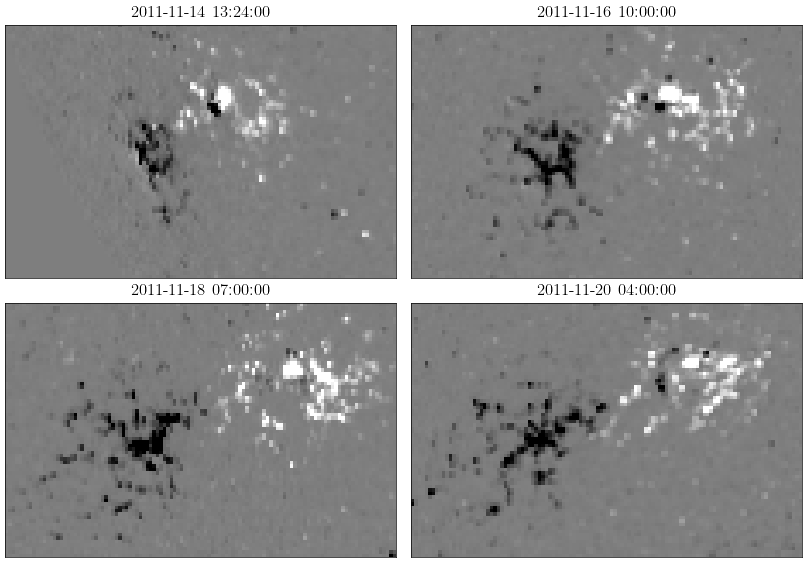

In [35]:
plt.style.use("science")
# A4 width in inches
width = 8.27

fig, ax = plt.subplots(2, 2, figsize=(width, width*0.7), sharex=True, sharey=True)

images = np.array([arr[index, 2] for index in indices])

max_value = np.percentile(images, 99.5)
min_value = np.percentile(images, 0.5)


norm = Normalize(vmin=min_value, vmax=max_value)

for i, index in enumerate(indices):
    img = arr[index, 2]
    ax[i//2, i%2].imshow(img, origin="lower", cmap="gray", norm=norm)
    ax[i//2, i%2].set_title(timestamps[i])

# Remove axis labels

for axi in ax.flat:
    axi.set(xticks=[], yticks=[])

plt.tight_layout()

plt.savefig("/home/julio/Downloads/example_harps.pdf", bbox_inches="tight")